In [ ]:
from konlpy.tag import Kkma

kkma = Kkma()

text = "아버지가 방에 들어갑니다."

morphs = kkma.morphs(text)
print(morphs)

pos = kkma.pos(text)
print(pos)

nouns = kkma.nouns(text)
print(nouns)

sentences = "오늘 날씨는 어때요? 내일은 덥다던데."
s = kkma.sentences(sentences)
print(s)

In [ ]:
from konlpy.tag import Komoran

komoran = Komoran()

text = "아버지가 방에 들어갑니다."

morphs = komoran.morphs(text)
print(morphs)

pos = komoran.pos(text)
print(pos)

nouns = komoran.nouns(text)
print(nouns)

In [ ]:
from konlpy.tag import Okt

okt = Okt()

text = "서울의 기온은 매우 낮을 것입니다."

morphs = okt.morphs(text)
print(morphs)

pos = okt.pos(text)
print(pos)

nouns = okt.nouns(text)
print(nouns)

text = "와... 개쩐닼ㅋㅋㅋㅋ"
print(okt.normalize(text))
print(okt.phrases(text))

In [ ]:
from konlpy.tag import Komoran

komoran = Komoran(userdic='./user_dic.tsv')
text = "우리 챗봇은 엔엘피를 좋아해"
pos = komoran.pos(text)
print(pos)

In [ ]:
from konlpy.tag import Komoran
import numpy as np

komoran = Komoran()
text = "오늘 날씨는 구름이 많아요."

nouns = komoran.nouns(text)
print(nouns)

dics = {}
for word in nouns:
    if word not in dics.keys():
        dics[word] = len(dics)
print(dics)

nb_classes = len(dics)
targets = list(dics.values())
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

In [6]:
from gensim.models import Word2Vec
from konlpy.tag import Komoran
import time

def read_review_data(filename):
    with open(filename, 'r', encoding="UTF8") as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

start = time.time()

print('1) 말뭉치 데이터 읽기 시작')
review_data = read_review_data('./ratings.txt')
print(len(review_data))
print('1) 말뭉치 데이터 읽기 완료 : ', time.time() - start)


print('2) 형태소에서 명사만 추출 시작')
komoran = Komoran()
docs = [komoran.nouns(sentence[1]) for sentence in review_data]
print('2) 형태소에서 명사만 추출 완료 : ', time.time() - start)

print('3) Word2Vec 모델 학습 시작')
model = Word2Vec(sentences=docs, size=200, window=4, hs=1, min_count=2, sg=1)
print('3) Word2Vec 모델 학습 완료 : ', time.time() - start)

print('4) 학습된 모델 저장 시작')
model.save('nvmc.model')
print('4) 학습된 모델 저장 완료 : ', time.time() - start)

print("corpus_count : ", model.corpus_count)
print("corpus_total_words : ", model.corpus_total_words)

1) 말뭉치 데이터 읽기 시작
200000
1) 말뭉치 데이터 읽기 완료 :  1.673100471496582
2) 형태소에서 명사만 추출 시작
2) 형태소에서 명사만 추출 완료 :  87.36483502388
3) Word2Vec 모델 학습 시작
3) Word2Vec 모델 학습 완료 :  105.85037922859192
4) 학습된 모델 저장 시작
4) 학습된 모델 저장 완료 :  106.3192617893219
corpus_count :  200000
corpus_total_words :  1076896


In [1]:
from gensim.models import Word2Vec

model = Word2Vec.load('nvmc.model')
print("corpus_total_words : ", model.corpus_total_words)

print('사랑 : ', model.wv['사랑'])

print("일요일 = 월요일\t", model.wv.similarity(w1='일요일', w2='월요일'))
print("안성기 = 배우\t", model.wv.similarity(w1='안성기', w2='배우'))
print("대기업 = 삼성\t", model.wv.similarity(w1='대기업', w2='삼성'))
print("일요일 != 삼성\t", model.wv.similarity(w1='일요일', w2='삼성'))
print("히어로 != 삼성\t", model.wv.similarity(w1='히어로', w2='삼성'))

print(model.wv.most_similar("안성기", topn=8))
print(model.wv.most_similar("시리즈", topn=8))

corpus_total_words :  1076896
사랑 :  [-2.18901098e-01 -2.30638266e-01 -3.23516726e-01 -1.10880509e-01
 -5.24657145e-02 -3.67247373e-01  2.49535859e-01 -1.10672571e-01
 -1.19900972e-01  5.35115078e-02 -4.20753807e-02 -1.63022757e-01
  3.10032796e-02  5.87000251e-02  1.80825457e-01 -9.81938988e-02
  1.56695947e-01  2.77327865e-01 -1.71590030e-01 -3.21360171e-01
 -1.89659074e-02  3.14504564e-01  1.14165783e-01 -9.37822089e-02
 -4.89308462e-02  1.42771974e-01  4.87611175e-01  2.64883310e-01
  1.31326869e-01  6.54022321e-02 -5.31798825e-02  1.06777422e-01
 -3.57340509e-03  8.59801546e-02  2.35606715e-01 -1.58076987e-01
 -1.03374198e-02  1.60184503e-01 -5.67743219e-02 -1.14387959e-01
  8.48006904e-02  1.62630752e-02  3.73258680e-01 -2.13345257e-03
  1.42463073e-01 -3.05327505e-01 -4.06463087e-01 -9.46389064e-02
  4.32475582e-02 -5.02498925e-01 -8.24670717e-02 -8.22420120e-02
 -1.53637022e-01  2.26479188e-01 -4.69100446e-01  4.85097691e-02
  4.71878827e-01  1.51207283e-01  3.23728085e-01  1.01

In [6]:
from konlpy.tag import Komoran

def word_ngram(bow, num_gram):
    text = tuple(bow)
    ngrams = [text[x:x + num_gram] for x in range(0, len(text))]
    return tuple(ngrams)

def similarity(doc1, doc2):
    cnt = 0
    for token in doc1:
        if token in doc2:
            cnt = cnt + 1
        return cnt/len(doc1)

sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었다.'

komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

doc1 = word_ngram(bow1, 2)
doc2 = word_ngram(bow2, 2)
doc3 = word_ngram(bow3, 2)

print(doc1)
print(doc2)

r1 = similarity(doc1, doc2)
r2 = similarity(doc3, doc1)

print(r1)
print(r2)

(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '트리니티'), ('트리니티', '입학'), ('입학',))
(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '대학교'), ('대학교', '입학'), ('입학',))
0.16666666666666666
0.16666666666666666


In [1]:
from konlpy.tag import Komoran
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

def make_term_doc_mat(sentence_bow, word_dics):
    freq_mat = {}
    
    for word in word_dics:
        freq_mat[word] = 0
        
    for word in word_dics:
        if word in sentence_bow:
            freq_mat[word] += 1
    
    return freq_mat

def make_vector(tdm):
    vec = []
    for key in tdm:
        vec.append(tdm[key])
    return vec

sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었다.'

komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

bow = bow1 + bow2 + bow3

word_dics = []
for token in bow:
    if token not in word_dics:
        word_dics.append(token)

freq_list1 = make_term_doc_mat(bow1, word_dics)
freq_list2 = make_term_doc_mat(bow2, word_dics)
freq_list3 = make_term_doc_mat(bow3, word_dics)
print(freq_list1)
print(freq_list2)
print(freq_list3)

doc1 = np.array(make_vector(freq_list1))
doc2 = np.array(make_vector(freq_list2))
doc3 = np.array(make_vector(freq_list3))

r1 = cos_sim(doc1, doc2)
r2 = cos_sim(doc3, doc1)
print(r1)
print(r2)

{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 1, '입학': 1, '대학교': 0, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 0, '입학': 1, '대학교': 1, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 0, '뉴턴': 1, '선생님': 0, '제안': 0, '트리니티': 0, '입학': 0, '대학교': 0, '밥': 1, '선생': 1, '님과 함께': 1}
0.8333333333333335
0.20412414523193154


In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7)
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

#신경망 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#생선한 신경망을 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

print('모델 평가')
model.evaluate(x_test, y_test)

model.summary()

model.save('mnist_model.h5')

Epoch 1/10
2100/2100 [==============================] - 2s 917us/step - loss: 1.2659 - accuracy: 0.6049 - val_loss: 0.3759 - val_accuracy: 0.8920
Epoch 2/10
2100/2100 [==============================] - 2s 890us/step - loss: 0.3726 - accuracy: 0.8937 - val_loss: 0.3170 - val_accuracy: 0.9064
Epoch 3/10
2100/2100 [==============================] - 2s 876us/step - loss: 0.2952 - accuracy: 0.9157 - val_loss: 0.2604 - val_accuracy: 0.9253
Epoch 4/10
2100/2100 [==============================] - 2s 870us/step - loss: 0.2629 - accuracy: 0.9258 - val_loss: 0.2385 - val_accuracy: 0.9314
Epoch 5/10
2100/2100 [==============================] - 2s 872us/step - loss: 0.2296 - accuracy: 0.9350 - val_loss: 0.2242 - val_accuracy: 0.9368
Epoch 6/10
2100/2100 [==============================] - 2s 857us/step - loss: 0.2098 - accuracy: 0.9397 - val_loss: 0.2053 - val_accuracy: 0.9417
Epoch 7/10
2100/2100 [==============================] - 2s 862us/step - loss: 0.1964 - accuracy: 0.9432 - val_loss: 0.1886 -

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_25 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 393us/step - loss: 0.2028 - accuracy: 0.9402


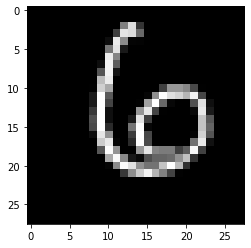

손글씨 이미지 예측값 :  [6]


In [35]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0

model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test)

plt.imshow(x_test[100], cmap="gray")
plt.show()

picks = [100]
predict = model.predict_classes(x_test[picks])
print("손글씨 이미지 예측값 : ", predict)

In [61]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

train_file = "./chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index

MAX_SEQ_LEN = 15
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))

train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size).take(test_size).batch(20)

dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 5
VOCAB_SIZE = len(word_index) + 1

input_layer = Input(shape=(MAX_SEQ_LEN,))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

concat = concatenate([pool1, pool2, pool3])

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)

predictions = Dense(3, activation=tf.nn.softmax)(logits)

model = Model(inputs=input_layer, outputs=predictions)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH)

loss, accuracy = model.evaluate(test_ds)
print('Accuracy: %f ' % (accuracy * 100))
print('Loss: %f' % (loss))

model.save('cnn_model.h5')

Epoch 1/5
414/414 [==============================] - 7s 16ms/step - loss: 0.9938 - accuracy: 0.4627 - val_loss: 0.5985 - val_accuracy: 0.7885
Epoch 2/5
414/414 [==============================] - 6s 15ms/step - loss: 0.5813 - accuracy: 0.7740 - val_loss: 0.2923 - val_accuracy: 0.8981
Epoch 3/5
414/414 [==============================] - 6s 15ms/step - loss: 0.3348 - accuracy: 0.8891 - val_loss: 0.1549 - val_accuracy: 0.9564
Epoch 4/5
414/414 [==============================] - 6s 15ms/step - loss: 0.2047 - accuracy: 0.9350 - val_loss: 0.0952 - val_accuracy: 0.9746
Epoch 5/5
60/60 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9873
Accuracy: 98.730963 
Loss: 0.055319


In [74]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing

train_file = "./chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

MAX_SEQ_LEN = 15
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(2000).batch(20)

model = load_model('cnn_model.h5')
model.summary()
model.evaluate(test_ds, verbose=2)

print("단어 시퀀스 : ", corpus[1])
print("단어 인덱스 시퀀스 : ", padded_seqs[1])
print("문장 분류(정답) : ", labels[1])

picks = [1]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis=1)
print("감정 예측 점수 : ", predict)
print("감정 예측 클래스 : ", predict_class.numpy())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 15, 128)      1715072     input_7[0][0]                    
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 15, 128)      0           embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 13, 128)      49280       dropout_10[0][0]                 
____________________________________________________________________________________________